In [87]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

In [88]:
nc_fp = '/Users/rdcrlzh1/Documents/uavsar-coherence/data/grmesa/gm.nc'
ds = xr.open_dataset(nc_fp)

In [89]:
ds = ds.sel(x = slice(-110, -108.10), y = slice(40, 39.02))

In [90]:
summer_idx = (ds.time1.dt.month > 4) & (ds.time1.dt.month < 11) & (ds.time2.dt.month > 4) & (ds.time2.dt.month < 11)
winter_idx = (ds.time1.dt.month <= 4) | (ds.time1.dt.month >= 11) | (ds.time2.dt.month <= 4) | (ds.time2.dt.month >= 11)

In [91]:
summer = ds.sel(time = summer_idx)
winter = ds.sel(time = winter_idx)

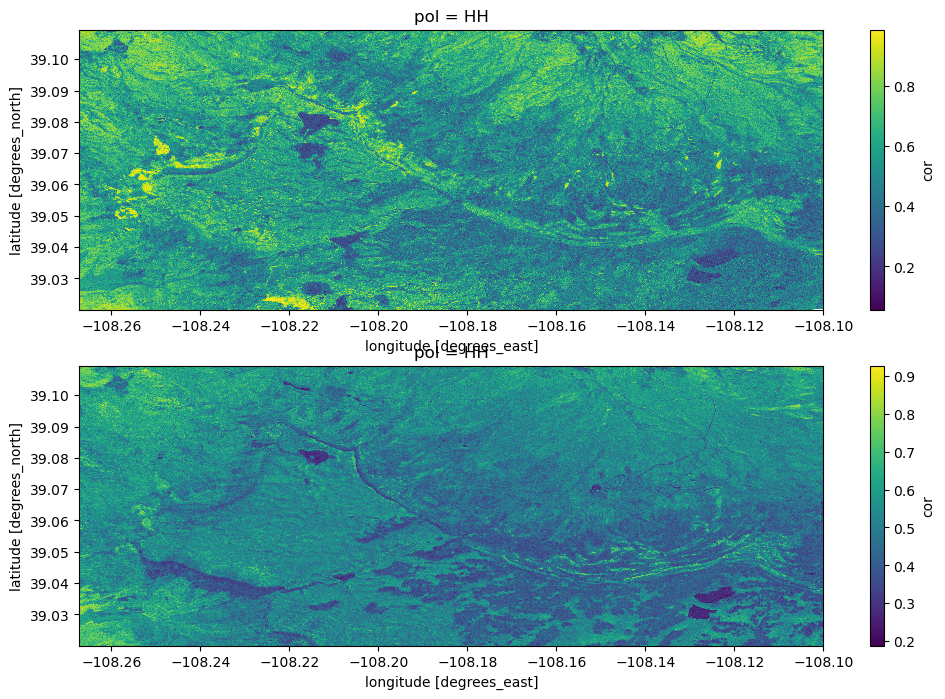

In [92]:
fig, axes = plt.subplots(2, 1, figsize = (12, 8))
summer['cor'].sel(pol = 'HH', x = slice(-110, -108.10), y = slice(40, 39.02)).mean('time').plot(ax = axes[0])
winter['cor'].sel(pol = 'HH', x = slice(-110, -108.10), y = slice(40, 39.02)).mean('time').plot(ax = axes[1])

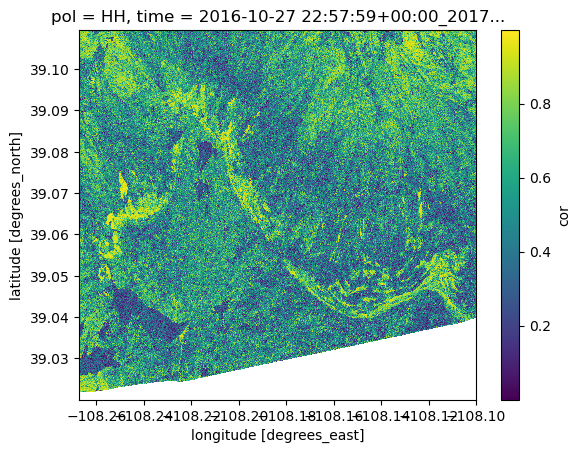

In [105]:
ds.sel(time = ds.temporal_baseline>300).sel(pol = 'HH').isel(time = 2)['cor'].plot()

(0.0, 70.0)

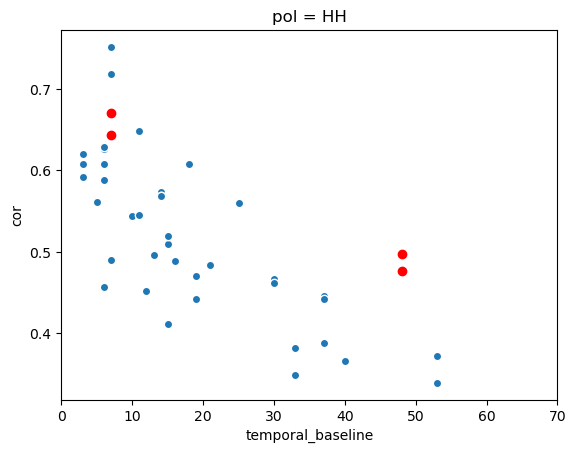

In [110]:
summer.sel(pol = 'HH').mean(['x','y'])['cor'].plot.scatter(x = 'temporal_baseline', color = 'red')
winter.sel(pol = 'HH').mean(['x','y'])['cor'].plot.scatter(x = 'temporal_baseline')

plt.xlim(0, 70)